## Web scraping product name, product links and product Image links 

In [7]:
import pandas as pd
import requests
from tqdm import tqdm
from bs4 import BeautifulSoup
import re
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings('ignore')

## Beautiful Soup

https://curlconverter.com/python/

### How to get headers and cookies for webscraping from amazon

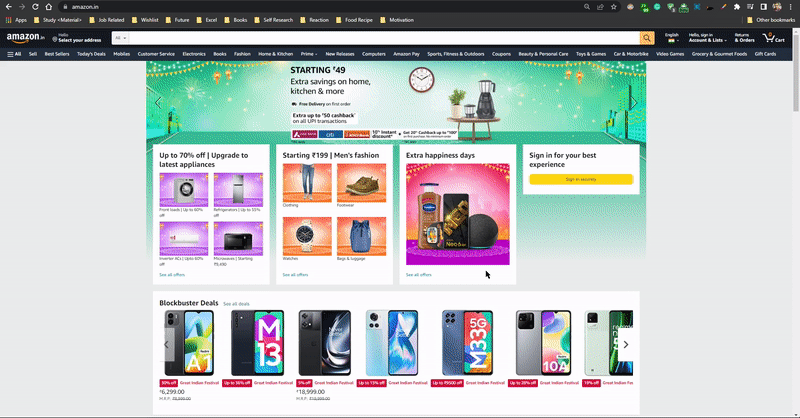

In [8]:
cookies = {
    'session-id': '259-3113978-6678618',
    'i18n-prefs': 'INR',
    'ubid-acbin': '260-8554202-6973909',
    'lc-acbin': 'en_IN',
    's_cc': 'true',
    's_nr': '1664868681185-Repeat',
    's_vnum': '2088252956746%26vn%3D2',
    's_dslv': '1664868681187',
    's_sq': '%5B%5BB%5D%5D',
    's_ppv': '66',
    'session-token': 'mZmUeIHWObnOI+UJrx4cIknqrZ9EM8Tr0FRKMLeUZuSd8fpwTWOeqyPHTnpayIRMaglWebgQzLMPUvOlpbsxHy0/OvJEWsrXkjfV34QohkDVvmeQJvYIyCe9136EwYNoAeOiPCDZ0FvwPx0BXLBE4McanIuryMNWQeDinHhgcJdI7usJiYUCshv5r8FiFrOjLemkrMk9wJn6eE5bZlnKmdUxOna61M7W',
    'session-id-time': '2082758401l',
    'csm-hit': 'tb:6GW1RVFP5HJ2X930BVEB+b-QEPPBMW48949YPY594HT|1664876731158&t:1664876731159&adb:adblk_no',
}

headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; s_cc=true; s_nr=1664868681185-Repeat; s_vnum=2088252956746%26vn%3D2; s_dslv=1664868681187; s_sq=%5B%5BB%5D%5D; s_ppv=66; session-token=mZmUeIHWObnOI+UJrx4cIknqrZ9EM8Tr0FRKMLeUZuSd8fpwTWOeqyPHTnpayIRMaglWebgQzLMPUvOlpbsxHy0/OvJEWsrXkjfV34QohkDVvmeQJvYIyCe9136EwYNoAeOiPCDZ0FvwPx0BXLBE4McanIuryMNWQeDinHhgcJdI7usJiYUCshv5r8FiFrOjLemkrMk9wJn6eE5bZlnKmdUxOna61M7W; session-id-time=2082758401l; csm-hit=tb:6GW1RVFP5HJ2X930BVEB+b-QEPPBMW48949YPY594HT|1664876731158&t:1664876731159&adb:adblk_no',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/ref=nav_logo',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '"Chromium";v="106", "Google Chrome";v="106", "Not;A=Brand";v="99"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [33]:
pages = [
    "https://www.amazon.in/s?k=books&page=1"
]

In [34]:
resp = requests.get(pages[0], cookies=cookies, headers=headers)
resp

<Response [200]>

In [ ]:
resp.text

In [35]:
soup = BeautifulSoup(resp.text, "html.parser") # html.parser, lxml

In [38]:
# 16 divs
divs = soup.find_all("div", {"class": "s-result-item s-asin sg-col-0-of-12 sg-col-16-of-20 sg-col s-widget-spacing-small sg-col-12-of-16"})

In [40]:
len(divs)

16

In [41]:
divs[0]

<div class="s-result-item s-asin sg-col-0-of-12 sg-col-16-of-20 sg-col s-widget-spacing-small sg-col-12-of-16" data-asin="9352530144" data-component-type="s-search-result" data-index="4" data-uuid="22782daf-0476-47d3-bc0a-e89c56517905"><div class="sg-col-inner"><div cel_widget_id="MAIN-SEARCH_RESULTS-4" class="s-widget-container s-spacing-small s-widget-container-height-small celwidget slot=MAIN template=SEARCH_RESULTS widgetId=search-results_3" data-csa-c-item-id="amzn1.asin.1.9352530144" data-csa-c-pos="3" data-csa-c-type="item" data-csa-op-log-render=""><div class="s-card-container s-overflow-hidden aok-relative puis-include-content-margin s-latency-cf-section s-card-border"><div class="a-section"><div class="sg-row"><div class="sg-col sg-col-4-of-12 sg-col-4-of-16 sg-col-4-of-20 s-list-col-left"><div class="sg-col-inner"><div class="a-section a-spacing-none aok-relative puis-status-badge-container s-list-status-badge-container"></div><div class="s-product-image-container aok-relati

### Extracting Product Name

In [42]:
for a in divs:
    print(a.find('span',{'class':'a-size-medium a-color-base a-text-normal'}).get_text())
    print()

Wren And Martin -high School English Grammar (Regular Edition)

Life's Amazing Secrets: How to Find Balance and Purpose in Your Life | Inspirational Zen book on motivation, self-development & healthy living

The Time Machine

Rich Dad Poor Dad - 20Th Anniversary Edition - Hindi

The Power of Your Subconscious Mind

Attitude Is Everything: Change Your Attitude ... Change Your Life!

The Courage To Be Disliked: How to free yourself, change your life and achieve real happiness (Courage To series)

Arthashastra

Do It Today: Overcome procrastination, improve productivity and achieve more meaningful things

Ikigai: The Japanese secret to a long and happy life

Three Thousand Stitches: Ordinary People, Extraordinary Lives

You Can

Death; An Inside Story: A book for all those who shall die by Sadguru: Spiritual Book that talks about life’s amazing secret, Motivational Book for transformation, Non-fiction, Penguin

As a Man Thinketh

Rich Dad Poor Dad : What The Rich Teach Their Kids About Mo

In [43]:
divs[0].find('span',{'class':'a-size-medium a-color-base a-text-normal'}).get_text()

'Wren And Martin -high School English Grammar (Regular Edition)'

In [45]:
divs[15].find('span',{'class':'a-size-medium a-color-base a-text-normal'}).get_text()

'The Subtle Art of Not Giving a F*ck: A Counterintuitive Approach to Living a Good Life (Mark Manson Collection Book 1)'

### Extracting Product Link

In [46]:
all_product_link = []
for a in divs:
    all_product_link.append(a.find('a',{'class':'a-link-normal s-no-outline'}, href=True))

In [47]:
len(all_product_link)

16

In [48]:
all_product_link[0]

<a class="a-link-normal s-no-outline" href="/School-English-Grammar-Composition-Regular/dp/9352530144/ref=sr_1_3?keywords=books&amp;qid=1665249519&amp;qu=eyJxc2MiOiI4LjQwIiwicXNhIjoiOC4xNyIsInFzcCI6IjguMjIifQ%3D%3D&amp;sr=8-3" target="_blank"><div class="a-section aok-relative s-image-fixed-height"><img alt="Wren And Martin -high School English Grammar (Regular Edition)" class="s-image" data-image-index="3" data-image-latency="s-product-image" data-image-load="" data-image-source-density="1" src="https://m.media-amazon.com/images/I/617ni21vHsL._AC_UY218_.jpg" srcset="https://m.media-amazon.com/images/I/617ni21vHsL._AC_UY218_.jpg 1x, https://m.media-amazon.com/images/I/617ni21vHsL._AC_UY327_FMwebp_QL65_.jpg 1.5x, https://m.media-amazon.com/images/I/617ni21vHsL._AC_UY436_FMwebp_QL65_.jpg 2x, https://m.media-amazon.com/images/I/617ni21vHsL._AC_UY545_FMwebp_QL65_.jpg 2.5x, https://m.media-amazon.com/images/I/617ni21vHsL._AC_UY654_FMwebp_QL65_.jpg 3x"/></div></a>

In [49]:
'https://www.amazon.in/' + divs[0].find('a',{'class':'a-link-normal s-no-outline'}, href=True).get('href')

'https://www.amazon.in//School-English-Grammar-Composition-Regular/dp/9352530144/ref=sr_1_3?keywords=books&qid=1665249519&qu=eyJxc2MiOiI4LjQwIiwicXNhIjoiOC4xNyIsInFzcCI6IjguMjIifQ%3D%3D&sr=8-3'

In [50]:
for link in all_product_link:
    print('https://www.amazon.in/' + link.get('href'))
    print()

https://www.amazon.in//School-English-Grammar-Composition-Regular/dp/9352530144/ref=sr_1_3?keywords=books&qid=1665249519&qu=eyJxc2MiOiI4LjQwIiwicXNhIjoiOC4xNyIsInFzcCI6IjguMjIifQ%3D%3D&sr=8-3

https://www.amazon.in//Lifes-Amazing-Secrets-Balance-Purpose/dp/0143442295/ref=sr_1_omk_4?keywords=books&qid=1665249519&qu=eyJxc2MiOiI4LjQwIiwicXNhIjoiOC4xNyIsInFzcCI6IjguMjIifQ%3D%3D&sr=8-4

https://www.amazon.in//Time-Machine-H-G-Wells/dp/8175992956/ref=sr_1_5?keywords=books&qid=1665249519&qu=eyJxc2MiOiI4LjQwIiwicXNhIjoiOC4xNyIsInFzcCI6IjguMjIifQ%3D%3D&sr=8-5

https://www.amazon.in//Rich-Dad-Poor-Robert-Kiyosaki/dp/8186775218/ref=sr_1_6?keywords=books&qid=1665249519&qu=eyJxc2MiOiI4LjQwIiwicXNhIjoiOC4xNyIsInFzcCI6IjguMjIifQ%3D%3D&sr=8-6

https://www.amazon.in//Power-Your-Subconscious-Mind-Success/dp/8172345666/ref=sr_1_7?keywords=books&qid=1665249519&qu=eyJxc2MiOiI4LjQwIiwicXNhIjoiOC4xNyIsInFzcCI6IjguMjIifQ%3D%3D&sr=8-7

https://www.amazon.in//Attitude-Everything-Change-Your-Life/dp/9351772071/r

In [51]:
product_links = []
for title in all_product_link:
    product_link = 'https://www.amazon.in/' +title.get('href')
    product_links.append(product_link)
product_links

['https://www.amazon.in//School-English-Grammar-Composition-Regular/dp/9352530144/ref=sr_1_3?keywords=books&qid=1665249519&qu=eyJxc2MiOiI4LjQwIiwicXNhIjoiOC4xNyIsInFzcCI6IjguMjIifQ%3D%3D&sr=8-3',
 'https://www.amazon.in//Lifes-Amazing-Secrets-Balance-Purpose/dp/0143442295/ref=sr_1_omk_4?keywords=books&qid=1665249519&qu=eyJxc2MiOiI4LjQwIiwicXNhIjoiOC4xNyIsInFzcCI6IjguMjIifQ%3D%3D&sr=8-4',
 'https://www.amazon.in//Time-Machine-H-G-Wells/dp/8175992956/ref=sr_1_5?keywords=books&qid=1665249519&qu=eyJxc2MiOiI4LjQwIiwicXNhIjoiOC4xNyIsInFzcCI6IjguMjIifQ%3D%3D&sr=8-5',
 'https://www.amazon.in//Rich-Dad-Poor-Robert-Kiyosaki/dp/8186775218/ref=sr_1_6?keywords=books&qid=1665249519&qu=eyJxc2MiOiI4LjQwIiwicXNhIjoiOC4xNyIsInFzcCI6IjguMjIifQ%3D%3D&sr=8-6',
 'https://www.amazon.in//Power-Your-Subconscious-Mind-Success/dp/8172345666/ref=sr_1_7?keywords=books&qid=1665249519&qu=eyJxc2MiOiI4LjQwIiwicXNhIjoiOC4xNyIsInFzcCI6IjguMjIifQ%3D%3D&sr=8-7',
 'https://www.amazon.in//Attitude-Everything-Change-Your-Lif

### Extracting Product Image Link

In [52]:
all_image = []
for a in divs:
    all_image.append(a.find('img',{'class':'s-image'}))

In [53]:
all_image[0]

<img alt="Wren And Martin -high School English Grammar (Regular Edition)" class="s-image" data-image-index="3" data-image-latency="s-product-image" data-image-load="" data-image-source-density="1" src="https://m.media-amazon.com/images/I/617ni21vHsL._AC_UY218_.jpg" srcset="https://m.media-amazon.com/images/I/617ni21vHsL._AC_UY218_.jpg 1x, https://m.media-amazon.com/images/I/617ni21vHsL._AC_UY327_FMwebp_QL65_.jpg 1.5x, https://m.media-amazon.com/images/I/617ni21vHsL._AC_UY436_FMwebp_QL65_.jpg 2x, https://m.media-amazon.com/images/I/617ni21vHsL._AC_UY545_FMwebp_QL65_.jpg 2.5x, https://m.media-amazon.com/images/I/617ni21vHsL._AC_UY654_FMwebp_QL65_.jpg 3x"/>

In [54]:
divs[0].find('img',{'class':'s-image'}).get('src')

'https://m.media-amazon.com/images/I/617ni21vHsL._AC_UY218_.jpg'

In [55]:
divs[0].find('img',{'class':'s-image'}).get('src')[:54]+'480_FMwebp_QL65_.jpg'

'https://m.media-amazon.com/images/I/617ni21vHsL._AC_UY480_FMwebp_QL65_.jpg'

In [56]:
for link in all_image:
    print(link.get('src')[:54]+'480_FMwebp_QL65_.jpg')
    print()

https://m.media-amazon.com/images/I/617ni21vHsL._AC_UY480_FMwebp_QL65_.jpg

https://m.media-amazon.com/images/I/81N7FmJhbhL._AC_UY480_FMwebp_QL65_.jpg

https://m.media-amazon.com/images/I/71+n2VSAiXS._AC_UY480_FMwebp_QL65_.jpg

https://m.media-amazon.com/images/I/6196RAUWoyL._AC_UY480_FMwebp_QL65_.jpg

https://m.media-amazon.com/images/I/71UwSHSZRnS._AC_UY480_FMwebp_QL65_.jpg

https://m.media-amazon.com/images/I/710jnzKlDTL._AC_UY480_FMwebp_QL65_.jpg

https://m.media-amazon.com/images/I/71k7V0QvcdL._AC_UY480_FMwebp_QL65_.jpg

https://m.media-amazon.com/images/I/917wUuyIaHL._AC_UY480_FMwebp_QL65_.jpg

https://m.media-amazon.com/images/I/61ZPDQOjw-L._AC_UY480_FMwebp_QL65_.jpg

https://m.media-amazon.com/images/I/814L+vq01mL._AC_UY480_FMwebp_QL65_.jpg

https://m.media-amazon.com/images/I/71ygf-LciIS._AC_UY480_FMwebp_QL65_.jpg

https://m.media-amazon.com/images/I/813uPMOnskL._AC_UY480_FMwebp_QL65_.jpg

https://m.media-amazon.com/images/I/91JO2pVO7RL._AC_UY480_FMwebp_QL65_.jpg

https://m.me

## Defining Web scraping Functions

In [57]:
def get_product_img_links(soup_obj: BeautifulSoup) -> str:
    try:
        product_img_link = soup_obj.find('img',{'class':'s-image'}).get('src')[:54]+'480_FMwebp_QL65_.jpg'
        return product_img_link
    except Exception as e:
        return 'No Image link Found'
        print(e)

In [58]:
get_product_img_links(divs[0])

'https://m.media-amazon.com/images/I/617ni21vHsL._AC_UY480_FMwebp_QL65_.jpg'

In [117]:
def get_product_links(soup_obj: BeautifulSoup) -> str:
    try:
        product_link = 'https://www.amazon.in/' + soup_obj.find('a',{'class':'a-link-normal s-no-outline'}, href=True).get('href')
        return product_link
    except Exception as e:
        return 'No Product link Found'
        print(e)

In [102]:
get_product_links(divs[0])

'https://www.amazon.in//Oneplus-Bluetooth-Wireless-Earphones-Bombastic/dp/B09TVVGXWS/ref=sr_1_3?keywords=bluetooth+earphones&qid=1664768944&qu=eyJxc2MiOiI3LjM0IiwicXNhIjoiNy40MSIsInFzcCI6IjYuODEifQ%3D%3D&sr=8-3'

In [118]:
def get_product_name(soup_obj: BeautifulSoup) -> str:
    try:
        product_name = soup_obj.find('a',{'class':'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'}).get_text()
        return product_name
    except Exception as e:
        return 'No Product Name Found'
        print(e)

In [109]:
get_product_name(divs[0])

'Oneplus Bullets Z2 Bluetooth Wireless in Ear Earphones with Mic, Bombastic Bass - 12.4 Mm Drivers, 10 Mins Charge - 20 Hrs Music, 30 Hrs Battery Life (Magico Black) '

In [112]:
def get_components(soup_obj: BeautifulSoup) -> dict:
    return {
        'product_name': get_product_name(soup_obj),
        'product_img': get_product_img_links(soup_obj),
        'product_link': get_product_links(soup_obj)
    }

In [113]:
get_components(divs[0])

{'product_name': 'Oneplus Bullets Z2 Bluetooth Wireless in Ear Earphones with Mic, Bombastic Bass - 12.4 Mm Drivers, 10 Mins Charge - 20 Hrs Music, 30 Hrs Battery Life (Magico Black) ',
 'product_img': 'https://m.media-amazon.com/images/I/51UhwaQXCpL._AC_UY218_.jpg',
 'product_link': 'https://www.amazon.in//Oneplus-Bluetooth-Wireless-Earphones-Bombastic/dp/B09TVVGXWS/ref=sr_1_3?keywords=bluetooth+earphones&qid=1664768944&qu=eyJxc2MiOiI3LjM0IiwicXNhIjoiNy40MSIsInFzcCI6IjYuODEifQ%3D%3D&sr=8-3'}

In [171]:
records = [get_components(div) for div in divs]
df = pd.DataFrame.from_records(records)
df

product_name  \
0   Oneplus Bullets Z2 Bluetooth Wireless in Ear E...   
1   Bluetooth Neckband for Vivo Y90, Vivo V11 Pro,...   
2   boAt Rockerz 255 Pro+ Bluetooth Neckband with ...   
3   boAt Rockerz 255F Sports Wireless Headset with...   
4   pTron Tangentbeat in-Ear Bluetooth 5.0 Wireles...   
5   boAt Rockerz 255 Neo Bluetooth Neckband with M...   
6   boAt Rockerz 255 Pro+ Bluetooth Neckband with ...   
7   boAt Airdopes 121v2 True Wireless Earbuds with...   
8   pTron Tangent Lite Bluetooth 5.0 Wireless in E...   
9   boAt Airdopes 141 True Wireless Earbuds with 4...   
10  Amazon Basics Bluetooth 5.0 Neckband with Up t...   
11  realme Buds Wireless 2S in Ear Earphone with m...   
12  JBL Endurance RunBT, Sports in Ear Wireless Bl...   
13  Oneplus Bullets Z2 Bluetooth Wireless in Ear E...   
14  boAt Rockerz 255 Neo Bluetooth Wireless in Ear...   
15  realme Buds Wireless 2S in Ear Earphone with m...   

                                          product_img  \
0   https://m.media-amazon.com/images/I/51UhwaQXCp...   
1   https://m.media-amazon.com/images/I/51Ivj-FTf6...   
2   https://m.media-amazon.com/images/I/513a+PRsMv...   
3   https://m.media-amazon.com/images/I/61N1qHNeeS...   
4   https://m.media-amazon.com/images/I/51K8Tkvtjg...   
5   https://m.media-amazon.com/images/I/51h4QPIyp3...   
6   https://m.media-amazon.com/images/I/515jdxLlma...   
7   https://m.media-amazon.com/images/I/5161KgWnNE...   
8   https://m.media-amazon.com/images/I/51Bi92jvyD...   
9   https://m.media-amazon.com/images/I/51HBom8xz7...   
10  https://m.media-amazon.com/images/I/51nRSOvjSL...   
11  https://m.media-amazon.com/images/I/61q-nUzbg7...   
12  https://m.media-amazon.com/images/I/61Kss6a0ld...   
13  https://m.media-amazon.com/images/I/51RP1QMh-m...   
14  https://m.media-amazon.com/images/I/51mIwbDljw...   
15  https://m.media-amazon.com/images/I/61sw7b6WaZ...   

                                         product_link  
0   https://www.amazon.in//Oneplus-Bluetooth-Wirel...  
1   https://www.amazon.in//Bluetooth-Wireless-Head...  
2   https://www.amazon.in//boAt-Rockerz-255-Pro-Ea...  
3   https://www.amazon.in//Boat-Rockerz-255F-Wirel...  
4   https://www.amazon.in//Tangentbeat-Bluetooth-H...  
5   https://www.amazon.in//boAt-Rockerz-255-Neo-Bl...  
6   https://www.amazon.in//boAt-Rockerz-255-Pro-Ea...  
7   https://www.amazon.in//Airdopes-121v2-Bluetoot...  
8   https://www.amazon.in//Tangent-Lite-Magnetic-B...  
9   https://www.amazon.in//Airdopes-141-Playtime-R...  
10  https://www.amazon.in//Bluetooth-Neckband-Play...  
11  https://www.amazon.in//realme-Wireless-Earphon...  
12  https://www.amazon.in//JBL-Endurance-Sweat-Wir...  
13  https://www.amazon.in//Oneplus-Bluetooth-Wirel...  
14  https://www.amazon.in//boAt-Rockerz-255-Neo-Bl...  
15  https://www.amazon.in//realme-Wireless-Earphon...

## Looping through multiple pages
One of the easiest methods to scrape multiple pages is to modify the base URL to accept a page variable that increments as needed.

Try for yourself! See how the URL changes as you go through multiple pages.

For Amazon product reviews, the only thing that seems to change is the number indicating which page it is.

#### Okay, now let’s put this to work in a function:

In [59]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html', 
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [60]:
# Initialize list to store reviews data later on
scraper = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    scrape = soup.find_all("div", {"class": "s-result-item s-asin sg-col-0-of-12 sg-col-16-of-20 sg-col s-widget-spacing-small sg-col-12-of-16"})
    try:
        for item in scrape:
            p = item.find('span',{'class':'a-size-medium a-color-base a-text-normal'})
            if p is not None:
                review = {
            'product_name': item.find('span',{'class':'a-size-medium a-color-base a-text-normal'}).get_text(),
            'product_img': item.find('img',{'class':'s-image'}).get('src')[:54]+'480_FMwebp_QL65_.jpg',
            'product_link': 'https://www.amazon.in/' + item.find('a',{'class':'a-link-normal s-no-outline'}, href=True).get('href')
                }
                scraper.append(review)
    except AttributeError as e:
        print(e)

In [61]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in range(1,6):
    soup = get_soup(f'https://www.amazon.in/s?k=books&page={x}')
    print(f'Getting page: {x}')
    get_reviews(soup)
    print(len(scraper))

Getting page: 1
16
Getting page: 2
32
Getting page: 3
48
Getting page: 4
64
Getting page: 5
80


In [62]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(scraper)
df

product_name  \
0   Wren And Martin -high School English Grammar (...   
1   Vision Ias Current Affairs Hindi January to Au...   
2   Life's Amazing Secrets: How to Find Balance an...   
3                                    The Time Machine   
4   Rich Dad Poor Dad - 20Th Anniversary Edition -...   
..                                                ...   
75  The Power of Your Subconscious Mind (PREMIUM P...   
76  Brijbhoomi Books And Handicrafts® Bhagavad Git...   
77                        How the Mango Got its Magic   
78  Blossom Moral Story Book for Kids 3 Years to 6...   
79  108 Panchatantra Stories (Illustrated) for chi...   

                                          product_img  \
0   https://m.media-amazon.com/images/I/617ni21vHs...   
1   https://m.media-amazon.com/images/I/61z1HO0unC...   
2   https://m.media-amazon.com/images/I/81N7FmJhbh...   
3   https://m.media-amazon.com/images/I/71+n2VSAiX...   
4   https://m.media-amazon.com/images/I/6196RAUWoy...   
..                                                ...   
75  https://m.media-amazon.com/images/I/51DlDekQ5-...   
76  https://m.media-amazon.com/images/I/310ILDQr5l...   
77  https://m.media-amazon.com/images/I/91TDBnocGV...   
78  https://m.media-amazon.com/images/I/7122h3jWvE...   
79  https://m.media-amazon.com/images/I/81VJ+MAc7Y...   

                                         product_link  
0   https://www.amazon.in//School-English-Grammar-...  
1   https://www.amazon.in//Vision-Current-Affairs-...  
2   https://www.amazon.in//Lifes-Amazing-Secrets-B...  
3   https://www.amazon.in//Time-Machine-H-G-Wells/...  
4   https://www.amazon.in//Rich-Dad-Poor-Robert-Ki...  
..                                                ...  
75  https://www.amazon.in//Power-Subconscious-Prem...  
76  https://www.amazon.in//Bhagavad-Gita-Bhaktiven...  
77  https://www.amazon.in//How-Mango-Got-its-Magic...  
78  https://www.amazon.in//Blossom-English-Colourf...  
79  https://www.amazon.in//108-Panchatantra-Storie...  

[80 rows x 3 columns]

In [64]:
df.product_img[15]

'https://m.media-amazon.com/images/I/81ZLwAwD-ML._AC_UY480_FMwebp_QL65_.jpg'

In [33]:
df[df.duplicated(keep='first')]

Empty DataFrame
Columns: [product_name, product_img, product_link]
Index: []

In [34]:
df[df.duplicated()]

Empty DataFrame
Columns: [product_name, product_img, product_link]
Index: []

In [35]:
df[df.duplicated('product_name', keep='first')]

product_name  \
16          IB COURSE BOOK:ENVIRONMENTAL SYSTEMS 2/E    
17  IB Chemistry 2014 Study Guide: Oxford Ib Diplo...   

                                          product_img  \
16  https://m.media-amazon.com/images/I/41lG23NeVD...   
17  https://m.media-amazon.com/images/I/81EQBZFZ2W...   

                                         product_link  
16  https://www.amazon.in//New-Environmental-Syste...  
17  https://www.amazon.in//Chemistry-Study-Guide-D...

In [36]:
df[df.duplicated('product_name', keep='last')]

product_name  \
14          IB COURSE BOOK:ENVIRONMENTAL SYSTEMS 2/E    
15  IB Chemistry 2014 Study Guide: Oxford Ib Diplo...   

                                          product_img  \
14  https://m.media-amazon.com/images/I/41lG23NeVD...   
15  https://m.media-amazon.com/images/I/81EQBZFZ2W...   

                                         product_link  
14  https://www.amazon.in//New-Environmental-Syste...  
15  https://www.amazon.in//Chemistry-Study-Guide-D...

In [37]:
df[df.duplicated('product_img', keep='first')]

product_name  \
16          IB COURSE BOOK:ENVIRONMENTAL SYSTEMS 2/E    
17  IB Chemistry 2014 Study Guide: Oxford Ib Diplo...   

                                          product_img  \
16  https://m.media-amazon.com/images/I/41lG23NeVD...   
17  https://m.media-amazon.com/images/I/81EQBZFZ2W...   

                                         product_link  
16  https://www.amazon.in//New-Environmental-Syste...  
17  https://www.amazon.in//Chemistry-Study-Guide-D...

In [38]:
df[df.duplicated('product_img', keep='last')]

product_name  \
14          IB COURSE BOOK:ENVIRONMENTAL SYSTEMS 2/E    
15  IB Chemistry 2014 Study Guide: Oxford Ib Diplo...   

                                          product_img  \
14  https://m.media-amazon.com/images/I/41lG23NeVD...   
15  https://m.media-amazon.com/images/I/81EQBZFZ2W...   

                                         product_link  
14  https://www.amazon.in//New-Environmental-Syste...  
15  https://www.amazon.in//Chemistry-Study-Guide-D...

In [39]:
df[df.duplicated(['product_name','product_img'])]

product_name  \
16          IB COURSE BOOK:ENVIRONMENTAL SYSTEMS 2/E    
17  IB Chemistry 2014 Study Guide: Oxford Ib Diplo...   

                                          product_img  \
16  https://m.media-amazon.com/images/I/41lG23NeVD...   
17  https://m.media-amazon.com/images/I/81EQBZFZ2W...   

                                         product_link  
16  https://www.amazon.in//New-Environmental-Syste...  
17  https://www.amazon.in//Chemistry-Study-Guide-D...

In [ ]:
product_id = product_IB['product_id']

In [106]:
len(product_IB.product_id.unique())

11

In [107]:
len(product_IB)

23

In [109]:
df = df.iloc[:len(product_IB)]
df

product_name  \
0   Oneplus Bullets Z2 Bluetooth Wireless in Ear E...   
1   Bluetooth Neckband for Vivo Y90, Vivo V11 Pro,...   
2   boAt Rockerz 255 Pro+ Bluetooth Neckband with ...   
3   boAt Rockerz 255 Pro+ Bluetooth Neckband with ...   
4   boAt Rockerz 255F Sports Wireless Headset with...   
5   pTron Tangentbeat in-Ear Bluetooth 5.0 Wireles...   
6   boAt Airdopes 121v2 True Wireless Earbuds with...   
7   boAt Airdopes 141 True Wireless Earbuds with 4...   
8   pTron Tangent Lite Bluetooth 5.0 Wireless in E...   
9   realme Buds Wireless 2S in Ear Earphone with m...   
10  JBL Endurance RunBT, Sports in Ear Wireless Bl...   
11  boAt Rockerz 255 Neo Bluetooth Neckband with M...   
12  Oneplus Bullets Z2 Bluetooth Wireless in Ear E...   
13  JBL Tune 215BT, 16 Hrs Playtime with Quick Cha...   
14  realme Buds Wireless 2S in Ear Earphone with m...   
15  boAt Rockerz 255 Neo Bluetooth Wireless in Ear...   
16  Sony WI-C100 Wireless Headphones with 25 Hrs B...   
17  Amazon Basics Bluetooth 5.0 Neckband with Up t...   
18  Mivi Collar Flash Bluetooth Wireless in Ear Ea...   
19  boAt Rockerz 255 Pro+ Bluetooth Neckband with ...   
20  Oneplus Bullets Z2 Bluetooth Wireless Earphone...   
21  boAt Rockerz 255 Neo Bluetooth Wireless in Ear...   
22  pTron Tangentbeat Bluetooth 5.0 Wireless in Ea...   

                                          product_img  \
0   https://m.media-amazon.com/images/I/51UhwaQXCp...   
1   https://m.media-amazon.com/images/I/51Ivj-FTf6...   
2   https://m.media-amazon.com/images/I/513a+PRsMv...   
3   https://m.media-amazon.com/images/I/515jdxLlma...   
4   https://m.media-amazon.com/images/I/61N1qHNeeS...   
5   https://m.media-amazon.com/images/I/51K8Tkvtjg...   
6   https://m.media-amazon.com/images/I/5161KgWnNE...   
7   https://m.media-amazon.com/images/I/51HBom8xz7...   
8   https://m.media-amazon.com/images/I/51Bi92jvyD...   
9   https://m.media-amazon.com/images/I/61q-nUzbg7...   
10  https://m.media-amazon.com/images/I/61Kss6a0ld...   
11  https://m.media-amazon.com/images/I/51h4QPIyp3...   
12  https://m.media-amazon.com/images/I/51RP1QMh-m...   
13  https://m.media-amazon.com/images/I/51-JsO-OCx...   
14  https://m.media-amazon.com/images/I/61sw7b6WaZ...   
15  https://m.media-amazon.com/images/I/51mIwbDljw...   
16  https://m.media-amazon.com/images/I/61QrZOUhfV...   
17  https://m.media-amazon.com/images/I/51nRSOvjSL...   
18  https://m.media-amazon.com/images/I/61MDDy1Lgk...   
19  https://m.media-amazon.com/images/I/51aBTOiXRl...   
20  https://m.media-amazon.com/images/I/514m1VhSUU...   
21  https://m.media-amazon.com/images/I/51mIwbDljw...   
22  https://m.media-amazon.com/images/I/51GJbc+43+...   

                                         product_link  
0   https://www.amazon.in//Oneplus-Bluetooth-Wirel...  
1   https://www.amazon.in//Bluetooth-Wireless-Head...  
2   https://www.amazon.in//boAt-Rockerz-255-Pro-Ea...  
3   https://www.amazon.in//boAt-Rockerz-255-Pro-Ea...  
4   https://www.amazon.in//Boat-Rockerz-255F-Wirel...  
5   https://www.amazon.in//Tangentbeat-Bluetooth-H...  
6   https://www.amazon.in//Airdopes-121v2-Bluetoot...  
7   https://www.amazon.in//Airdopes-141-Playtime-R...  
8   https://www.amazon.in//Tangent-Lite-Magnetic-B...  
9   https://www.amazon.in//realme-Wireless-Earphon...  
10  https://www.amazon.in//JBL-Endurance-Sweat-Wir...  
11  https://www.amazon.in//boAt-Rockerz-255-Neo-Bl...  
12  https://www.amazon.in//Oneplus-Bluetooth-Wirel...  
13  https://www.amazon.in//JBL-Playtime-Bluetooth-...  
14  https://www.amazon.in//realme-Wireless-Earphon...  
15  https://www.amazon.in//boAt-Rockerz-255-Neo-Bl...  
16  https://www.amazon.in//Sony-Wireless-Headphone...  
17  https://www.amazon.in//Bluetooth-Neckband-Play...  
18  https://www.amazon.in//Mivi-Bluetooth-Earphone...  
19  https://www.amazon.in//boAt-Rockerz-255-Pro-Ea...  
20  https://www.amazon.in//Bluetooth-Wireless-Earp...  
21  https://www.amazon.in//boAt-Rockerz-255-Neo-Bl...  
22  https://www

In [110]:
df = df.join(product_id)
df

product_name  \
0   Oneplus Bullets Z2 Bluetooth Wireless in Ear E...   
1   Bluetooth Neckband for Vivo Y90, Vivo V11 Pro,...   
2   boAt Rockerz 255 Pro+ Bluetooth Neckband with ...   
3   boAt Rockerz 255 Pro+ Bluetooth Neckband with ...   
4   boAt Rockerz 255F Sports Wireless Headset with...   
5   pTron Tangentbeat in-Ear Bluetooth 5.0 Wireles...   
6   boAt Airdopes 121v2 True Wireless Earbuds with...   
7   boAt Airdopes 141 True Wireless Earbuds with 4...   
8   pTron Tangent Lite Bluetooth 5.0 Wireless in E...   
9   realme Buds Wireless 2S in Ear Earphone with m...   
10  JBL Endurance RunBT, Sports in Ear Wireless Bl...   
11  boAt Rockerz 255 Neo Bluetooth Neckband with M...   
12  Oneplus Bullets Z2 Bluetooth Wireless in Ear E...   
13  JBL Tune 215BT, 16 Hrs Playtime with Quick Cha...   
14  realme Buds Wireless 2S in Ear Earphone with m...   
15  boAt Rockerz 255 Neo Bluetooth Wireless in Ear...   
16  Sony WI-C100 Wireless Headphones with 25 Hrs B...   
17  Amazon Basics Bluetooth 5.0 Neckband with Up t...   
18  Mivi Collar Flash Bluetooth Wireless in Ear Ea...   
19  boAt Rockerz 255 Pro+ Bluetooth Neckband with ...   
20  Oneplus Bullets Z2 Bluetooth Wireless Earphone...   
21  boAt Rockerz 255 Neo Bluetooth Wireless in Ear...   
22  pTron Tangentbeat Bluetooth 5.0 Wireless in Ea...   

                                          product_img  \
0   https://m.media-amazon.com/images/I/51UhwaQXCp...   
1   https://m.media-amazon.com/images/I/51Ivj-FTf6...   
2   https://m.media-amazon.com/images/I/513a+PRsMv...   
3   https://m.media-amazon.com/images/I/515jdxLlma...   
4   https://m.media-amazon.com/images/I/61N1qHNeeS...   
5   https://m.media-amazon.com/images/I/51K8Tkvtjg...   
6   https://m.media-amazon.com/images/I/5161KgWnNE...   
7   https://m.media-amazon.com/images/I/51HBom8xz7...   
8   https://m.media-amazon.com/images/I/51Bi92jvyD...   
9   https://m.media-amazon.com/images/I/61q-nUzbg7...   
10  https://m.media-amazon.com/images/I/61Kss6a0ld...   
11  https://m.media-amazon.com/images/I/51h4QPIyp3...   
12  https://m.media-amazon.com/images/I/51RP1QMh-m...   
13  https://m.media-amazon.com/images/I/51-JsO-OCx...   
14  https://m.media-amazon.com/images/I/61sw7b6WaZ...   
15  https://m.media-amazon.com/images/I/51mIwbDljw...   
16  https://m.media-amazon.com/images/I/61QrZOUhfV...   
17  https://m.media-amazon.com/images/I/51nRSOvjSL...   
18  https://m.media-amazon.com/images/I/61MDDy1Lgk...   
19  https://m.media-amazon.com/images/I/51aBTOiXRl...   
20  https://m.media-amazon.com/images/I/514m1VhSUU...   
21  https://m.media-amazon.com/images/I/51mIwbDljw...   
22  https://m.media-amazon.com/images/I/51GJbc+43+...   

                                         product_link  product_id  
0   https://www.amazon.in//Oneplus-Bluetooth-Wirel...  B00000JFIB  
1   https://www.amazon.in//Bluetooth-Wireless-Head...  B00000JFIB  
2   https://www.amazon.in//boAt-Rockerz-255-Pro-Ea...  B00000JFIB  
3   https://www.amazon.in//boAt-Rockerz-255-Pro-Ea...  B00000JFIB  
4   https://www.amazon.in//Boat-Rockerz-255F-Wirel...  B00000JFIB  
5   https://www.amazon.in//Tangentbeat-Bluetooth-H...  B00001ZUIB  
6   https://www.amazon.in//Airdopes-121v2-Bluetoot...  B00004YKIB  
7   https://www.amazon.in//Airdopes-141-Playtime-R...  B00004YKIB  
8   https://www.amazon.in//Tangent-Lite-Magnetic-B...  B0000511IB  
9   https://www.amazon.in//realme-Wireless-Earphon...  B0000520IB  
10  https://www.amazon.in//JBL-Endurance-Sweat-Wir...  B0000520IB  
11  https://www.amazon.in//boAt-Rockerz-255-Neo-Bl...  B0000520IB  
12  https://www.amazon.in//Oneplus-Bluetooth-Wirel...  B00006HQIB  
13  https://www.amazon.in//JBL-Playtime-Bluetooth-...  B000087LIB  
14  https://www.amazon.in//realme-Wireless-Earphon...  B00009RUIB  
15  https://www.amazon.in//boAt-Rockerz-255-Neo-Bl...  B00009W3IB  
16  https://www.amazon.in//Sony-Wireless-Headphone...  B0000C88IB  
17  https://www.amazon.in//Bluetooth-Neckband-Play...  B0000C88IB  
18  https:/

In [111]:
df1 = df.drop_duplicates(subset='product_id', keep='first').reset_index(drop=True)
df1

product_name  \
0   Oneplus Bullets Z2 Bluetooth Wireless in Ear E...   
1   pTron Tangentbeat in-Ear Bluetooth 5.0 Wireles...   
2   boAt Airdopes 121v2 True Wireless Earbuds with...   
3   pTron Tangent Lite Bluetooth 5.0 Wireless in E...   
4   realme Buds Wireless 2S in Ear Earphone with m...   
5   Oneplus Bullets Z2 Bluetooth Wireless in Ear E...   
6   JBL Tune 215BT, 16 Hrs Playtime with Quick Cha...   
7   realme Buds Wireless 2S in Ear Earphone with m...   
8   boAt Rockerz 255 Neo Bluetooth Wireless in Ear...   
9   Sony WI-C100 Wireless Headphones with 25 Hrs B...   
10  pTron Tangentbeat Bluetooth 5.0 Wireless in Ea...   

                                          product_img  \
0   https://m.media-amazon.com/images/I/51UhwaQXCp...   
1   https://m.media-amazon.com/images/I/51K8Tkvtjg...   
2   https://m.media-amazon.com/images/I/5161KgWnNE...   
3   https://m.media-amazon.com/images/I/51Bi92jvyD...   
4   https://m.media-amazon.com/images/I/61q-nUzbg7...   
5   https://m.media-amazon.com/images/I/51RP1QMh-m...   
6   https://m.media-amazon.com/images/I/51-JsO-OCx...   
7   https://m.media-amazon.com/images/I/61sw7b6WaZ...   
8   https://m.media-amazon.com/images/I/51mIwbDljw...   
9   https://m.media-amazon.com/images/I/61QrZOUhfV...   
10  https://m.media-amazon.com/images/I/51GJbc+43+...   

                                         product_link  product_id  
0   https://www.amazon.in//Oneplus-Bluetooth-Wirel...  B00000JFIB  
1   https://www.amazon.in//Tangentbeat-Bluetooth-H...  B00001ZUIB  
2   https://www.amazon.in//Airdopes-121v2-Bluetoot...  B00004YKIB  
3   https://www.amazon.in//Tangent-Lite-Magnetic-B...  B0000511IB  
4   https://www.amazon.in//realme-Wireless-Earphon...  B0000520IB  
5   https://www.amazon.in//Oneplus-Bluetooth-Wirel...  B00006HQIB  
6   https://www.amazon.in//JBL-Playtime-Bluetooth-...  B000087LIB  
7   https://www.amazon.in//realme-Wireless-Earphon...  B00009RUIB  
8   https://www.amazon.in//boAt-Rockerz-255-Neo-Bl...  B00009W3IB  
9   https://www.amazon.in//Sony-Wireless-Headphone...  B0000C88IB  
10  https://www.amazon.in//Tangentbeat-Bluetooth-H...  B0000DK6IB

In [112]:
product_IB = pd.merge(product_IB, df1, on='product_id')
product_IB

product_name_x  \
0   Oneplus Bullets Z2 Bluetooth Wireless in Ear E...   
1   Oneplus Bullets Z2 Bluetooth Wireless in Ear E...   
2   Oneplus Bullets Z2 Bluetooth Wireless in Ear E...   
3   Oneplus Bullets Z2 Bluetooth Wireless in Ear E...   
4   Oneplus Bullets Z2 Bluetooth Wireless in Ear E...   
5   pTron Tangentbeat in-Ear Bluetooth 5.0 Wireles...   
6   boAt Airdopes 121v2 True Wireless Earbuds with...   
7   boAt Airdopes 121v2 True Wireless Earbuds with...   
8   pTron Tangent Lite Bluetooth 5.0 Wireless in E...   
9   realme Buds Wireless 2S in Ear Earphone with m...   
10  realme Buds Wireless 2S in Ear Earphone with m...   
11  realme Buds Wireless 2S in Ear Earphone with m...   
12  Oneplus Bullets Z2 Bluetooth Wireless in Ear E...   
13  JBL Tune 215BT, 16 Hrs Playtime with Quick Cha...   
14  realme Buds Wireless 2S in Ear Earphone with m...   
15  boAt Rockerz 255 Neo Bluetooth Wireless in Ear...   
16  Sony WI-C100 Wireless Headphones with 25 Hrs B...   
17  Sony WI-C100 Wireless Headphones with 25 Hrs B...   
18  Sony WI-C100 Wireless Headphones with 25 Hrs B...   
19  Sony WI-C100 Wireless Headphones with 25 Hrs B...   
20  Sony WI-C100 Wireless Headphones with 25 Hrs B...   
21  Sony WI-C100 Wireless Headphones with 25 Hrs B...   
22  pTron Tangentbeat Bluetooth 5.0 Wireless in Ea...   

                                        product_img_x  \
0   https://m.media-amazon.com/images/I/51UhwaQXCp...   
1   https://m.media-amazon.com/images/I/51UhwaQXCp...   
2   https://m.media-amazon.com/images/I/51UhwaQXCp...   
3   https://m.media-amazon.com/images/I/51UhwaQXCp...   
4   https://m.media-amazon.com/images/I/51UhwaQXCp...   
5   https://m.media-amazon.com/images/I/51K8Tkvtjg...   
6   https://m.media-amazon.com/images/I/5161KgWnNE...   
7   https://m.media-amazon.com/images/I/5161KgWnNE...   
8   https://m.media-amazon.com/images/I/51Bi92jvyD...   
9   https://m.media-amazon.com/images/I/61q-nUzbg7...   
10  https://m.media-amazon.com/images/I/61q-nUzbg7...   
11  https://m.media-amazon.com/images/I/61q-nUzbg7...   
12  https://m.media-amazon.com/images/I/51RP1QMh-m...   
13  https://m.media-amazon.com/images/I/51-JsO-OCx...   
14  https://m.media-amazon.com/images/I/61sw7b6WaZ...   
15  https://m.media-amazon.com/images/I/51mIwbDljw...   
16  https://m.media-amazon.com/images/I/61QrZOUhfV...   
17  https://m.media-amazon.com/images/I/61QrZOUhfV...   
18  https://m.media-amazon.com/images/I/61QrZOUhfV...   
19  https://m.media-amazon.com/images/I/61QrZOUhfV...   
20  https://m.media-amazon.com/images/I/61QrZOUhfV...   
21  https://m.media-amazon.com/images/I/61QrZOUhfV...   
22  https://m.media-amazon.com/images/I/51GJbc+43+...   

                                       product_link_x  product_id  \
0   https://www.amazon.in//Oneplus-Bluetooth-Wirel...  B00000JFIB   
1   https://www.amazon.in//Oneplus-Bluetooth-Wirel...  B00000JFIB   
2   https://www.amazon.in//Oneplus-Bluetooth-Wirel...  B00000JFIB   
3   https://www.amazon.in//Oneplus-Bluetooth-Wirel...  B00000JFIB   
4   https://www.amazon.in//Oneplus-Bluetooth-Wirel...  B00000JFIB   
5   https://www.amazon.in//Tangentbeat-Bluetooth-H...  B00001ZUIB   
6   https://www.amazon.in//Airdopes-121v2-Bluetoot...  B00004YKIB   
7   https://www.amazon.in//Airdopes-121v2-Bluetoot...  B00004YKIB   
8   https://www.amazon.in//Tangent-Lite-Magnetic-B...  B0000511IB   
9   https://www.amazon.in//realme-Wireless-Earphon...  B0000520IB   
10  https://www.amazon.in//realme-Wireless-Earphon...  B0000520IB   
11  https://www.amazon.in//realme-Wireless-Earphon...  B0000520IB   
12  https://www.amazon.in//Oneplus-Bluetooth-Wirel...  B00006HQIB   
13  https://www.amazon.in//JBL-Playtime-Bluetooth-...  B000087LIB   
14  https://www.amazon.in//realme-Wireless-Earphon...  B00009RUIB   
15  https://www.amazon.in//boAt-Rockerz-255-Neo-Bl...  B00009W3IB   
16  https://www.amazon.in//Sony-Wireless-Headphone...  B0000C88IB   
17  https://www.amazon.in//Sony-Wireless-Headphone...  B000

In [68]:
product_IB.product_link[0]

'https://www.amazon.in//Oneplus-Bluetooth-Wireless-Earphones-Bombastic/dp/B09TVVGXWS/ref=sr_1_3?keywords=bluetooth+earphones&qid=1664808690&qu=eyJxc2MiOiI3LjM0IiwicXNhIjoiNy40MSIsInFzcCI6IjYuODEifQ%3D%3D&sr=8-3&url=https%3A%2F%2Fwww.amazon.in%2Fs%3Fk%3Dbluetooth+earphones&wait=2'

### Product IB dataframe

In [41]:
product_IB = pd.DataFrame(reviews[reviews['product_code']=='product_IB']).reset_index(drop=True)
product_IB =  pd.merge(product_IB, 
                       pd.DataFrame(scraper).iloc[:len(product_IB)]\
                       .join(product_IB['product_id'])\
                       .drop_duplicates(subset='product_id', keep='first')\
                       .reset_index(drop=True)
                       , on='product_id')
product_IB.to_csv('product_IB.csv',index=False)

In [42]:
pd.read_csv('product_IB.csv')

user_id  product_id  Ratings  Time_stamp product_code  \
0    AWBUA3QUM6DRY  B00000JFIB      4.0  1188777600   product_IB   
1   A3DDOTHLXBI8SE  B00000JFIB      5.0  1203811200   product_IB   
2   A1U3M4R71OZOR4  B00000JFIB      5.0   956188800   product_IB   
3    AGOL1UIZVLC75  B00000JFIB      5.0  1017792000   product_IB   
4   A2EIHE8CZA0PBF  B00000JFIB      5.0   971654400   product_IB   
5   A23ZO1BVFFLGHO  B00001ZUIB      5.0  1006819200   product_IB   
6    ATELSGYOHCL3E  B00004YKIB      5.0   971222400   product_IB   
7   A2DN7RUNX06BZ1  B00004YKIB      5.0   994464000   product_IB   
8   A1YQQR1JFO8O9N  B0000511IB      3.0  1153267200   product_IB   
9    AE1DOVZ3OB5BG  B0000520IB      5.0  1166918400   product_IB   
10  A1GYLBYZ2NGZ45  B0000520IB      5.0  1288742400   product_IB   
11  A11VZ410YANQIV  B0000520IB      4.0   981763200   product_IB   
12  A2VHCSRAI5J5D2  B00006HQIB      4.0  1367539200   product_IB   
13  A14ICKXR8QITT4  B000087LIB      5.0  1175385600   product_IB   
14  A29LX2AH0Y0YBV  B00009RUIB      5.0  1345766400   product_IB   
15  A25RTRAPQAJBDJ  B00009W3IB      5.0  1182729600   product_IB   
16  A1G6ZYJHXN4S7O  B0000C88IB      5.0  1365724800   product_IB   
17  A13SYBDYJ3HVXR  B0000C88IB      2.0  1205193600   product_IB   
18  A29L1Y0CGSLOOG  B0000C88IB      1.0  1373241600   product_IB   
19  A3NAPTMNLTLKSO  B0000C88IB      5.0  1256169600   product_IB   
20  A3HF7SPB6H81W7  B0000C88IB      1.0  1366156800   product_IB   
21  A1V4DY1VW4LJ5P  B0000C88IB      3.0  1269907200   product_IB   
22  A34LQ791ACZ0JC  B0000DK6IB      5.0  1180828800   product_IB   

                                         product_name  \
0   IB Intelligence Bureau Assistant Central Intel...   
1   IB Intelligence Bureau Assistant Central Intel...   
2   IB Intelligence Bureau Assistant Central Intel...   
3   IB Intelligence Bureau Assistant Central Intel...   
4   IB Intelligence Bureau Assistant Central Intel...   
5   Oxford IB Diploma Programme: IB Mathematics: a...   
6   Oxford IB Diploma Programme: IB Mathematics: a...   
7   Oxford IB Diploma Programme: IB Mathematics: a...   
8   IB DIPLOMA PROGRAMME: BUSINESS MANAGEMENT STUD...   
9   Ib Physics Internal Assessment £Ia]: Seven Exc...   
10  Ib Physics Internal Assessment £Ia]: Seven Exc...   
11  Ib Physics Internal Assessment £Ia]: Seven Exc...   
12           Chemistry for the IB Diploma Coursebook    
13  IB French B Course Book Pack: Oxford IB Diplom...   
14          IB COURSE BOOK:ENVIRONMENTAL SYSTEMS 2/E    
15  IB Chemistry 2014 Study Guide: Oxford Ib Diplo...   
16          IB COURSE BOOK:ENVIRONMENTAL SYSTEMS 2/E    
17          IB COURSE BOOK:ENVIRONMENTAL SYSTEMS 2/E    
18          IB COURSE BOOK:ENVIRONMENTAL SYSTEMS 2/E    
19          IB COURSE BOOK:ENVIRONMENTAL SYSTEMS 2/E    
20          IB COURSE BOOK:ENVIRONMENTAL SYSTEMS 2/E    
21          IB COURSE BOOK:ENVIRONMENTAL SYSTEMS 2/E    
22  English A: Language and Literature for the IB ...   

                                          product_img  \
0   https://m.media-amazon.com/images/I/71e03+x3bP...   
1   https://m.media-amazon.com/images/I/71e03+x3bP...   
2   https://m.media-amazon.com/images/I/71e03+x3bP...   
3   https://m.media-amazon.com/images/I/71e03+x3bP...   
4   https://m.media-amazon.com/images/I/71e03+x3bP...   
5   https://m.media-amazon.com/images/I/91E9rPMXnu...   
6   https://m.media-amazon.com/images/I/91qoeCMVkK...   
7   https://m.media-amazon.com/images/I/91qoeCMVkK...   
8   https://m.media-amazon.com/images/I/51Re077+w2...   
9   https://m.media-amazon.com/images/I/618ch+3hui...   
10  https://m.media-amazon.com/images/I/618ch+3hui...   
11  https://m.media-amazon.com/images/I/618ch+3hui...   
12  https://m.media-amazon.com/images/I/81meGZTRQg...   
13  https://m.media-amazon.com/images/I/51rDp++Yn4...   
14  https://m.media-amazon.com/images/I/41lG23NeVD...   
15  https://m.media-amazon.com/images/I/81EQBZFZ2W...   
16  https://m.media-amazon.com/images/I/

In [43]:
product_IB.product_img[0]

'https://m.media-amazon.com/images/I/71e03+x3bPL._AC_UY218_.jpg'

###  To scrape for this layout
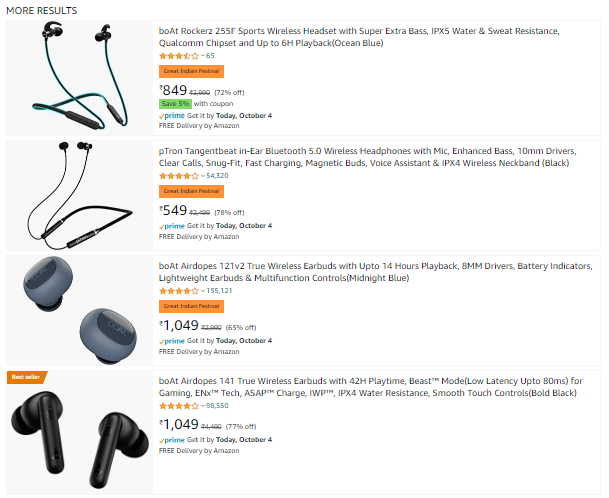

In [41]:
def get_scraped(category):
    scraper=[]
    base_url = f'https://www.amazon.in/s?k={category.replace(" ", "+")}'
    for x in tqdm(range(1,23)):
        url = base_url+f'&page={x}'
        r = requests.get(url, cookies=cookies, headers=headers)
#         params={'url': url, 'wait': 2})
        soup = BeautifulSoup(r.text, 'html.parser')
        scrape = soup.find_all("div", {"class": "s-result-item s-asin sg-col-0-of-12 sg-col-16-of-20 sg-col s-widget-spacing-small sg-col-12-of-16"})
        for item in scrape:
            review = {
                'product_name': item.find('span',{'class':'a-size-medium a-color-base a-text-normal'}).get_text(),
                'product_img': item.find('img',{'class':'s-image'}).get('src')[:54]+'480_FMwebp_QL65_.jpg',
                'product_link': 'https://www.amazon.in/' + item.find('a',{'class':'a-link-normal s-no-outline'}, href=True).get('href')
                    }
            scraper.append(review)
        if soup.find('span', {'class': 's-pagination-item s-pagination-next s-pagination-disabled'}):
            break
    # Save results to a dataframe, then export as CSV
    df = pd.DataFrame(scraper)
    return df

In [42]:
df = get_scraped('aaa batteries')
df

  0%|          | 0/22 [00:00<?, ?it/s]

product_name  \
0    Duracell Alkaline AAA Battery Chhota Power, 10...   
1        Duracell Ultra Alkaline AAA Battery, 8 Pieces   
2    Duracell Ultra Alkaline AAA4 Batteries (Pack o...   
3    Eveready AAA Heavy Duty Batteries - 10 Pieces ...   
4      Duracell Ultra Alkaline Battery AAA - 20 Pieces   
..                                                 ...   
301  ERH India (2 Pcs) Battery Holder for 2 AA Batt...   
302  Immense AAA Ultra Digital Alkaline Battery Pac...   
303  Digital Shoppy Rechargeable Battery, HR03 AAA ...   
304  INVENTO 4Pcs 3. 6V 2500Mah Vipow Nimh Recharge...   
305  Energizer Lithium 123 3V Battery - 10 Year She...   

                                           product_img  \
0    https://m.media-amazon.com/images/I/61UmAauFle...   
1    https://m.media-amazon.com/images/I/71CX+Z-xVF...   
2    https://m.media-amazon.com/images/I/71nFy6mU+t...   
3    https://m.media-amazon.com/images/I/71TP9KLQ7T...   
4    https://m.media-amazon.com/images/I/719xp5zEMY...   
..                                                 ...   
301  https://m.media-amazon.com/images/I/51KhobqO1h...   
302  https://m.media-amazon.com/images/I/51rxlVAVVZ...   
303  https://m.media-amazon.com/images/I/51c8bDBj4D...   
304  https://m.media-amazon.com/images/I/61bNHQVcpp...   
305  https://m.media-amazon.com/images/I/41mLA7Ob9v...   

                                          product_link  
0    https://www.amazon.in//ANAV-Duracell-Alkaline-...  
1    https://www.amazon.in//Duracell-Alkaline-Batte...  
2    https://www.amazon.in//Duracell-Alkaline-Batte...  
3    https://www.amazon.in//Eveready-Alkaline-Batte...  
4    https://www.amazon.in//Duracell-Ultra-Alkaline...  
..                                                 ...  
301  https://www.amazon.in//India-Holder-Batteries-...  
302  https://www.amazon.in//Immense-Ultra-Digital-A...  
303  https://www.amazon.in//Digital-Shoppy-Recharge...  
304  https://www.amazon.in//INVENTO-2500mah-Vipow-R...  
305  https://www.amazon.in//Energizer-Lithium-123-3...  

[306 rows x 3 columns]

### To scrape for this layout
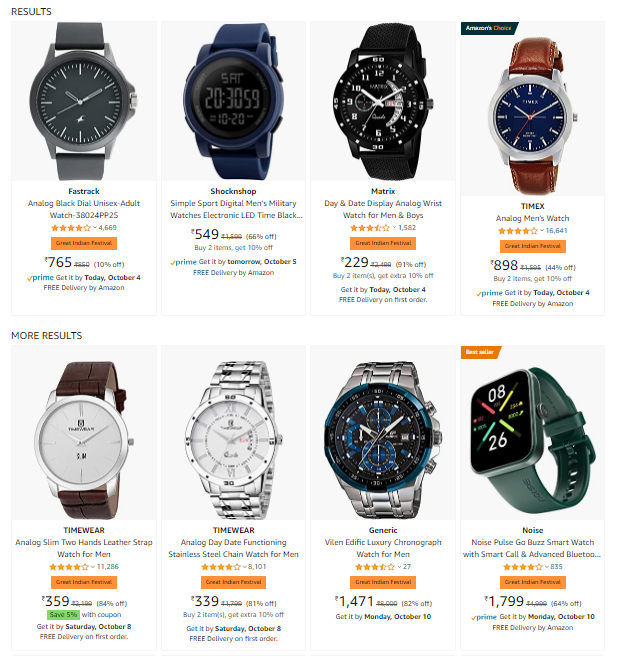

In [21]:
def get_scraped(category):
    scraper=[]
    base_url = f'https://www.amazon.in/s?k={category.replace(" ", "+")}'
    for x in tqdm_notebook(range(1,21)):
        url = base_url+f'&page={x}'
        r = requests.get(url, cookies=cookies, headers=headers)
        soup = BeautifulSoup(r.text, 'html.parser') 
        scrape = soup.find_all("div", {"class": "sg-col-4-of-12 s-result-item s-asin sg-col-4-of-16 sg-col s-widget-spacing-small sg-col-4-of-20"})
        for item in scrape:
            p = item.find('span',{'class':'a-size-medium a-color-base a-text-normal'})
            if p is not None:
                review = {
                    'product_name': item.find('span',{'class':'a-size-medium a-color-base a-text-normal'}).get_text(),
                    'product_img': item.find('img',{'class':'s-image'}).get('src')[:54]+'480_FMwebp_QL65_.jpg',
                    'product_link': 'https://www.amazon.in/' + item.find('a',{'class':'a-link-normal s-no-outline'}, href=True).get('href')
                        }
                scraper.append(review)
        if soup.find('span', {'class': 's-pagination-item s-pagination-next s-pagination-disabled'}):
            break
    # Save results to a dataframe, then export as CSV
    df = pd.DataFrame(scraper)
    return df

In [22]:
df = get_scraped('aer')
df

  0%|          | 0/20 [00:00<?, ?it/s]

product_name  \
0    Godrej Ezee Aer Power Pocket | Air Freshener- ...   
1    Godrej aer Matic Refill - Automatic Air Freshe...   
2    Godrej aer Matic Refill - Automatic Air Freshe...   
3    Godrej aer Matic Refill - Automatic Air Freshe...   
4    Godrej aer Smart Matic Refill - BLUETOOTH ENAB...   
..                                                 ...   
259                                       Wine Aerator   
260  100 Box of Pink Razor Blades Disposable Stainl...   
261  40 Twin Blade Premium Disposable Razors in Bul...   
262  Next-Level Clean Deodorant (Ginger Grapefruit,...   
263  100 Twin Blade Biodegradable Disposable Razors...   

                                           product_img  \
0    https://m.media-amazon.com/images/I/61L-epiEFP...   
1    https://m.media-amazon.com/images/I/61kGN75x0A...   
2    https://m.media-amazon.com/images/I/61kS0AzQ+u...   
3    https://m.media-amazon.com/images/I/61463RCBok...   
4    https://m.media-amazon.com/images/I/61MKiHNCpy...   
..                                                 ...   
259  https://m.media-amazon.com/images/I/61pMu8CwdN...   
260  https://m.media-amazon.com/images/I/81l4uziPG1...   
261  https://m.media-amazon.com/images/I/81Fnqjpwxd...   
262  https://m.media-amazon.com/images/I/71H1Fsze2+...   
263  https://m.media-amazon.com/images/I/91uOwlJ88M...   

                                          product_link  
0    https://www.amazon.in//Godrej-aer-Bathroom-Fra...  
1    https://www.amazon.in//Godrej-Aer-Matic-Refill...  
2    https://www.amazon.in//Godrej-Aer-Matic-Refill...  
3    https://www.amazon.in//Godrej-Aer-Matic-Refill...  
4    https://www.amazon.in//Godrej-aer-Smart-Matic-...  
..                                                 ...  
259  https://www.amazon.in//Dare-2-Aer-COMINHKPR140...  
260  https://www.amazon.in//Disposable-Stainless-Ho...  
261  https://www.amazon.in//Twin-Blade-Premium-Disp...  
262  https://www.amazon.in//Next-Level-Clean-Deodor...  
263  https://www.amazon.in//Twin-Blade-Biodegradabl...  

[264 rows x 3 columns]

### To scrape for all Amazon Layout

In [65]:
def get_scraped(category):
    scraper=[]
    base_url = f'https://www.amazon.in/s?k={category.replace(" ", "+")}'
    for x in tqdm_notebook(range(1,40)):
        url = base_url+f'&page={x}'
        r = requests.get(url, cookies=cookies, headers=headers)
        soup = BeautifulSoup(r.text, 'html.parser')
        if soup.find("div", {"class": "s-result-item s-asin sg-col-0-of-12 sg-col-16-of-20 sg-col s-widget-spacing-small sg-col-12-of-16"}):
            scrape = soup.find_all("div", {"class": "s-result-item s-asin sg-col-0-of-12 sg-col-16-of-20 sg-col s-widget-spacing-small sg-col-12-of-16"})
            for item in scrape:
                review = {
                    'product_name': item.find('span',{'class':'a-size-medium a-color-base a-text-normal'}).get_text(),
                    'product_img': item.find('img',{'class':'s-image'}).get('src')[:54]+'480_FMwebp_QL65_.jpg',
                    'product_link': 'https://www.amazon.in/' + item.find('a',{'class':'a-link-normal s-no-outline'}, href=True).get('href')
                        }
                scraper.append(review)
        elif soup.find("div", {"class": "sg-col-4-of-12 s-result-item s-asin sg-col-4-of-16 sg-col s-widget-spacing-small sg-col-4-of-20"}):
            scrape = soup.find_all("div", {"class": "sg-col-4-of-12 s-result-item s-asin sg-col-4-of-16 sg-col s-widget-spacing-small sg-col-4-of-20"})
            for item in scrape:
                if item.find('span',{'class':'a-size-base-plus a-color-base a-text-normal'}):
                    p = item.find('span',{'class':'a-size-base-plus a-color-base a-text-normal'})
                    if p is not None:
                        review = {
                            'product_name': item.find('span',{'class':'a-size-base-plus a-color-base a-text-normal'}).get_text(),
                            'product_img': item.find('img',{'class':'s-image'}).get('src')[:54]+'480_FMwebp_QL65_.jpg',
                            'product_link': 'https://www.amazon.in/' + item.find('a',{'class':'a-link-normal s-no-outline'}, href=True).get('href')
                                }
                        scraper.append(review)
                elif item.find('span',{'class':'a-size-medium a-color-base a-text-normal'}):
                    p = item.find('span',{'class':'a-size-medium a-color-base a-text-normal'})
                    if p is not None:
                        review = {
                            'product_name': item.find('span',{'class':'a-size-medium a-color-base a-text-normal'}).get_text(),
                            'product_img': item.find('img',{'class':'s-image'}).get('src')[:54]+'480_FMwebp_QL65_.jpg',
                            'product_link': 'https://www.amazon.in/' + item.find('a',{'class':'a-link-normal s-no-outline'}, href=True).get('href')
                                }
                        scraper.append(review)
        if soup.find('span', {'class': 's-pagination-item s-pagination-next s-pagination-disabled'}):
            break
    # Save results to a dataframe, then export as CSV
    df = pd.DataFrame(scraper)
    return df

In [72]:
df = get_scraped('aer')
df

  0%|          | 0/39 [00:00<?, ?it/s]

product_name  \
0    Godrej Ezee Aer Power Pocket | Air Freshener- ...   
1    Elegant Lifestyle Mint Air Freshner Gel Based ...   
2    Godrej aer Matic Refill - Automatic Air Freshe...   
3    Godrej aer Matic Refill - Automatic Air Freshe...   
4    Godrej aer Matic Refill - Automatic Air Freshe...   
..                                                 ...   
252                                       Wine Aerator   
253  100 Box of Pink Razor Blades Disposable Stainl...   
254  100 Twin Blade Biodegradable Disposable Razors...   
255  20 Twin Blade Biodegradable Disposable Razors ...   
256  Next-Level Clean Deodorant (Ginger Grapefruit,...   

                                           product_img  \
0    https://m.media-amazon.com/images/I/61L-epiEFP...   
1    https://m.media-amazon.com/images/I/31WYS81ZkI...   
2    https://m.media-amazon.com/images/I/61kGN75x0A...   
3    https://m.media-amazon.com/images/I/61kS0AzQ+u...   
4    https://m.media-amazon.com/images/I/61463RCBok...   
..                                                 ...   
252  https://m.media-amazon.com/images/I/61pMu8CwdN...   
253  https://m.media-amazon.com/images/I/81l4uziPG1...   
254  https://m.media-amazon.com/images/I/91uOwlJ88M...   
255  https://m.media-amazon.com/images/I/81OB-NawMH...   
256  https://m.media-amazon.com/images/I/71H1Fsze2+...   

                                          product_link  
0    https://www.amazon.in//Godrej-aer-Bathroom-Fra...  
1    https://www.amazon.in//Lifestyle-Mint-Car-Dash...  
2    https://www.amazon.in//Godrej-Aer-Matic-Refill...  
3    https://www.amazon.in//Godrej-Aer-Matic-Refill...  
4    https://www.amazon.in//Godrej-Aer-Matic-Refill...  
..                                                 ...  
252  https://www.amazon.in//Dare-2-Aer-COMINHKPR140...  
253  https://www.amazon.in//Disposable-Stainless-Ho...  
254  https://www.amazon.in//Twin-Blade-Biodegradabl...  
255  https://www.amazon.in//Twin-Blade-Biodegradabl...  
256  https://www.amazon.in//Next-Level-Clean-Deodor...  

[257 rows x 3 columns]

In [73]:
df.product_img[0]

'https://m.media-amazon.com/images/I/61L-epiEFPS._AC_UL480_FMwebp_QL65_.jpg'